In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

import time
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
import numpy as np
X = np.load('features.npy')/255
y = np.load('labels.npy')

X_test = np.load('test_features.npy')/255
y_test = np.load('test_labels.npy')

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=22)

In [4]:
inputs = Input(shape=(32,32, 3))

x = Conv2D(16, (3,3), padding="same", activation='relu')(inputs)
#x = MaxPooling2D(pool_size=(2,2))(x)
block_1_output = Dropout(0)(x)


x = Conv2D(64, (3,3), padding="same", activation='relu')(block_1_output)
x = MaxPooling2D(pool_size=(2,2))(x)
block_2_output = Dropout(0)(x)

x = Conv2D(128, (3,3), padding="same", activation='relu')(block_2_output)
x = MaxPooling2D(pool_size=(2,2))(x)
block_3_output = Dropout(0)(x)

#x = Conv2D(128, (3,3), padding="same", activation='relu')(block_3_output)
#x = MaxPooling2D(pool_size=(2,2))(x)
#block_4_output = Dropout(0)(x)

x = Flatten()(block_3_output)
x = Dense(256, activation='relu')(x)

prediction = Dense(43, activation='softmax')(x)

model_1 = Model(inputs=inputs, outputs=prediction)


In [5]:
model_1.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [6]:
model_1.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val,y_val))#, callbacks=[tensorboard])

Train on 27446 samples, validate on 11763 samples
Epoch 1/30
27446/27446 [==============================] - 6s 232us/step - loss: 1.5265 - accuracy: 0.5672 - val_loss: 0.5648 - val_accuracy: 0.8319
Epoch 2/30
27446/27446 [==============================] - 5s 167us/step - loss: 0.2101 - accuracy: 0.9426 - val_loss: 0.2629 - val_accuracy: 0.9180
Epoch 3/30
27446/27446 [==============================] - 5s 167us/step - loss: 0.0610 - accuracy: 0.9829 - val_loss: 0.0791 - val_accuracy: 0.9784
Epoch 4/30
27446/27446 [==============================] - 5s 168us/step - loss: 0.0268 - accuracy: 0.9925 - val_loss: 0.0426 - val_accuracy: 0.9901
Epoch 5/30
27446/27446 [==============================] - 5s 170us/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0310 - val_accuracy: 0.9944
Epoch 6/30
27446/27446 [==============================] - 5s 170us/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0273 - val_accuracy: 0.9952
Epoch 7/30
27446/27446 [==============================] - 5s 1

In [16]:
from keract import get_activations
activations = get_activations(model_1, np.reshape(X_train[100], (1,32,32,3)))

input_1 (1, 32, 32, 3) 


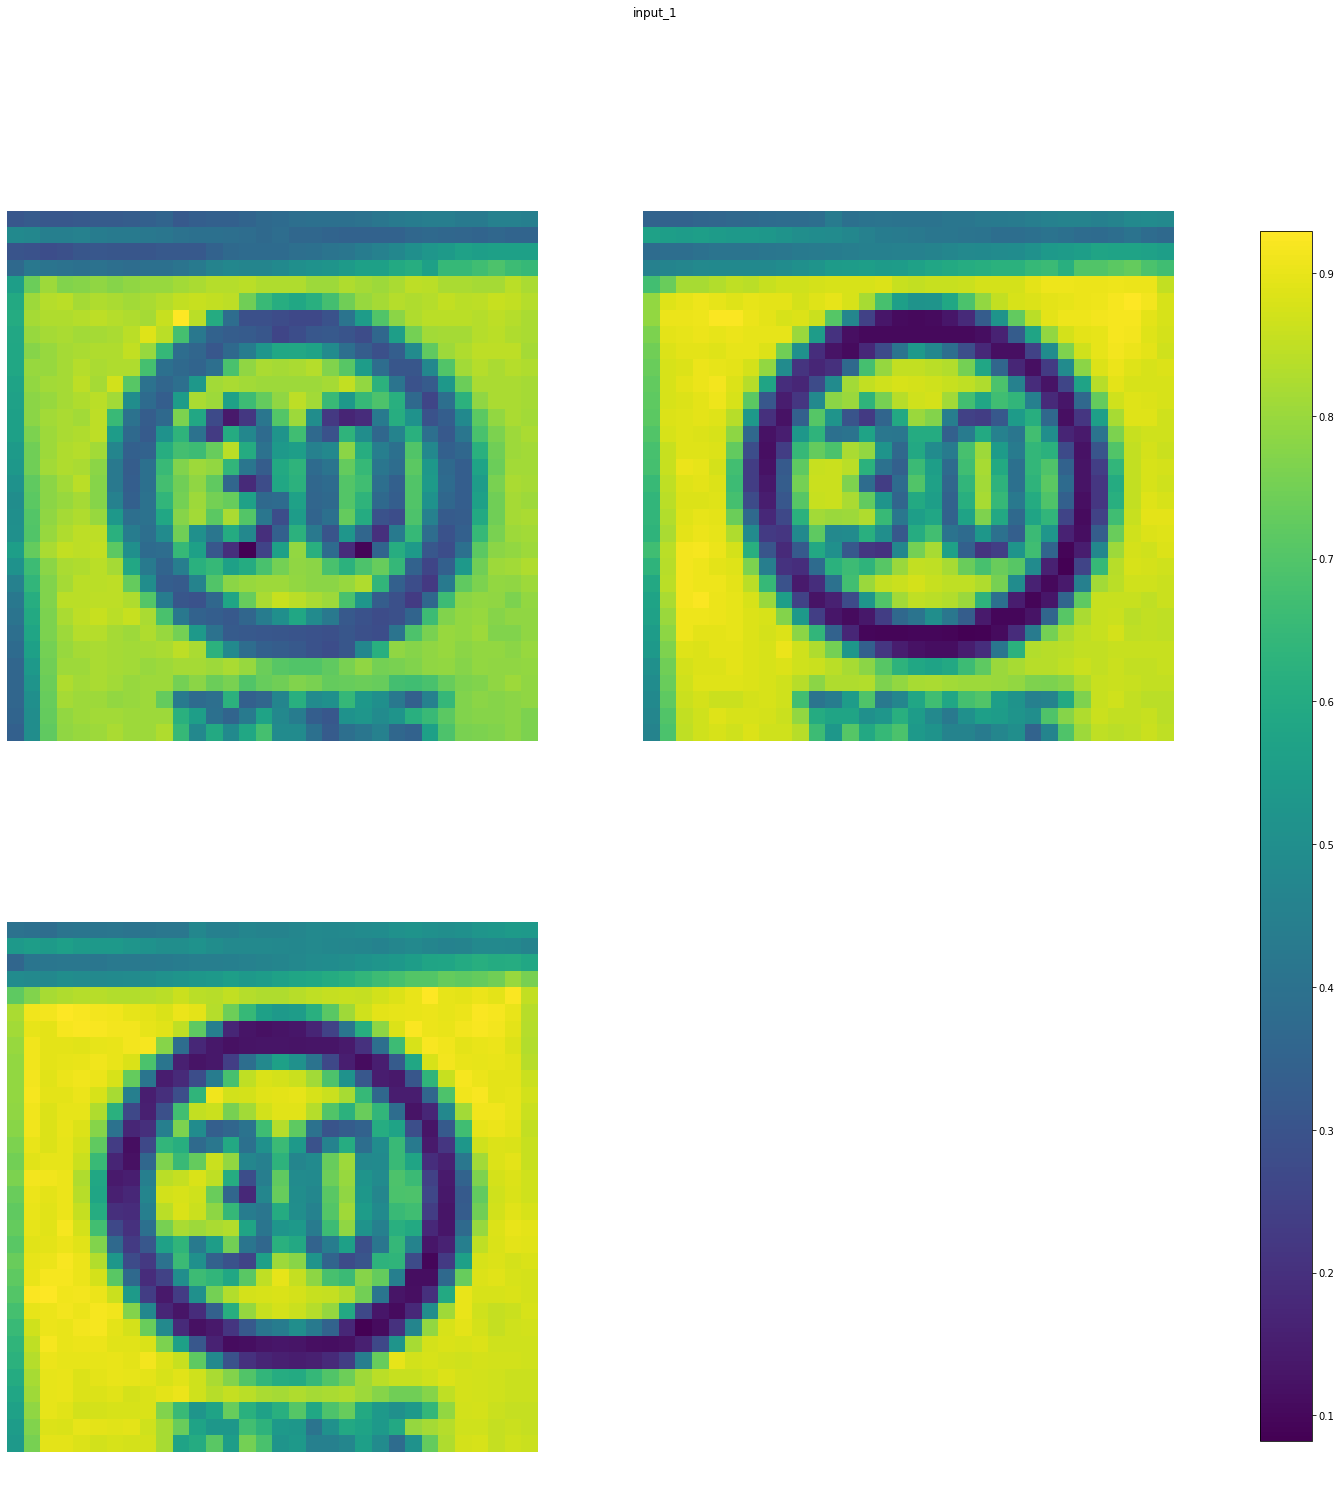

conv2d_1 (1, 32, 32, 16) 


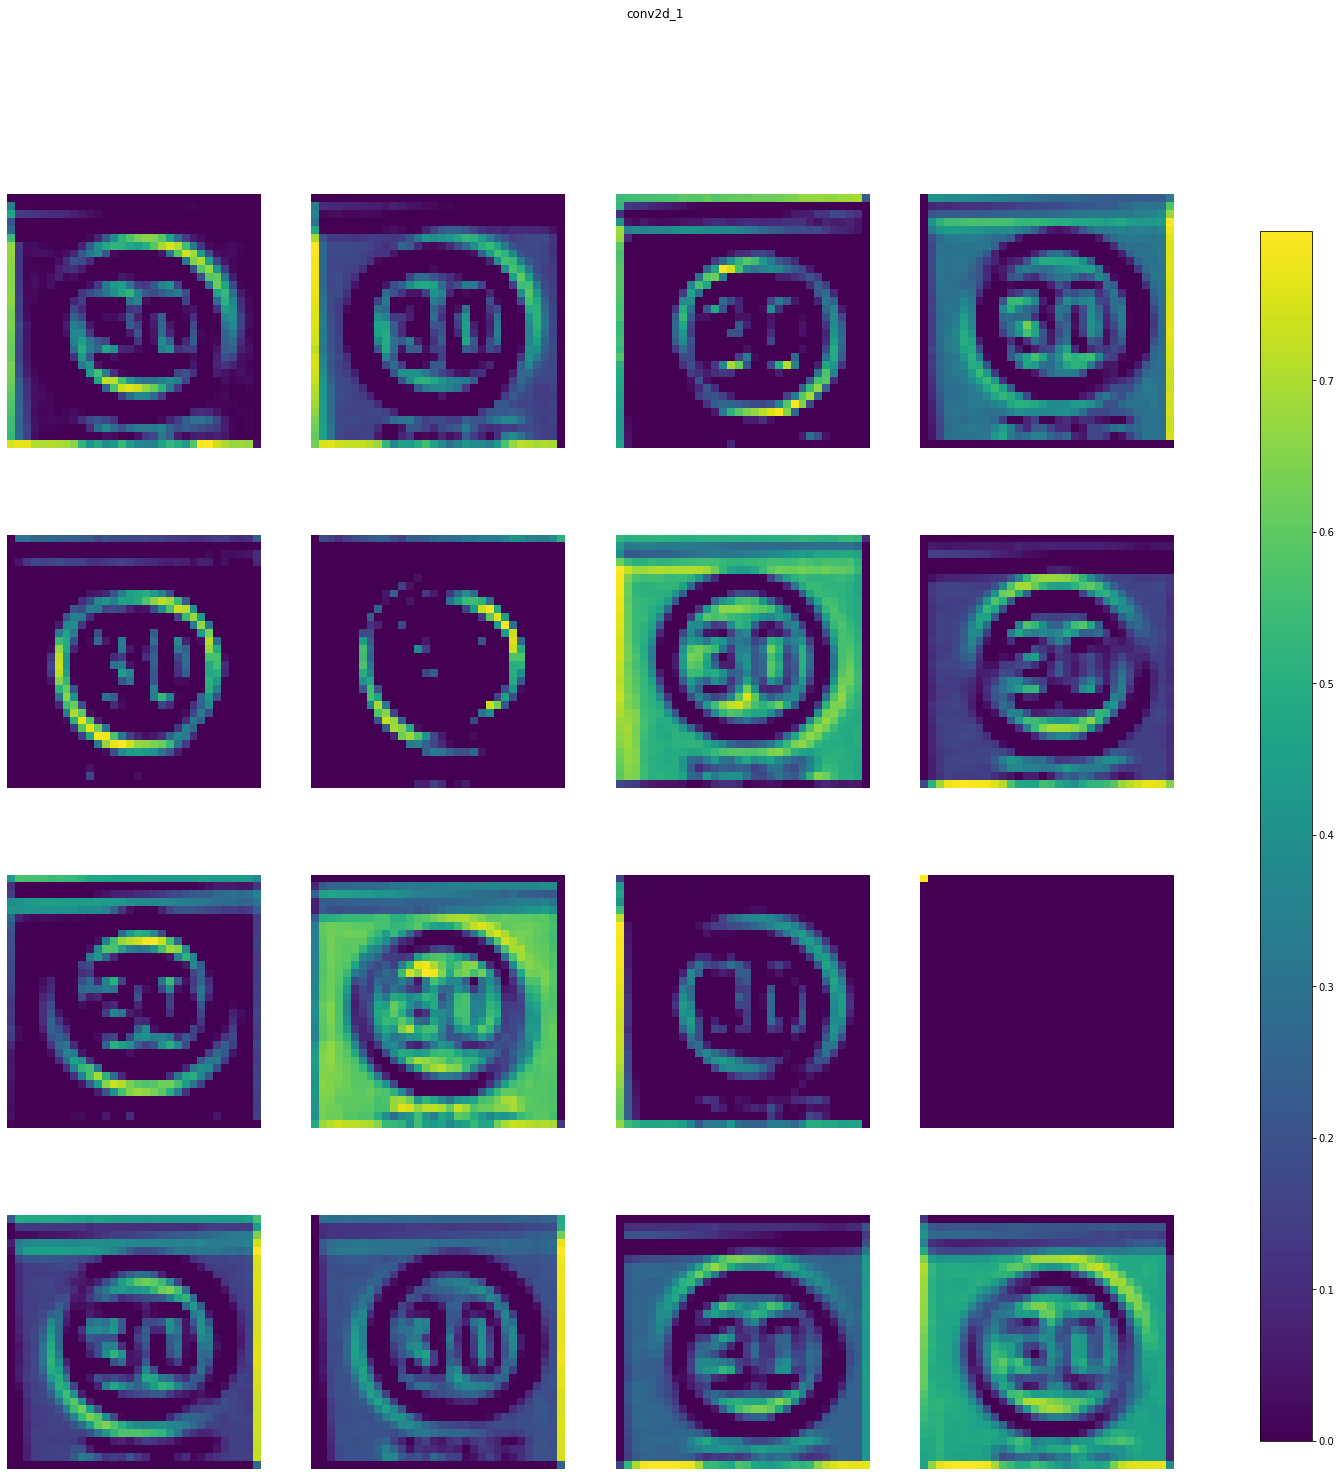

dropout_1 (1, 32, 32, 16) 


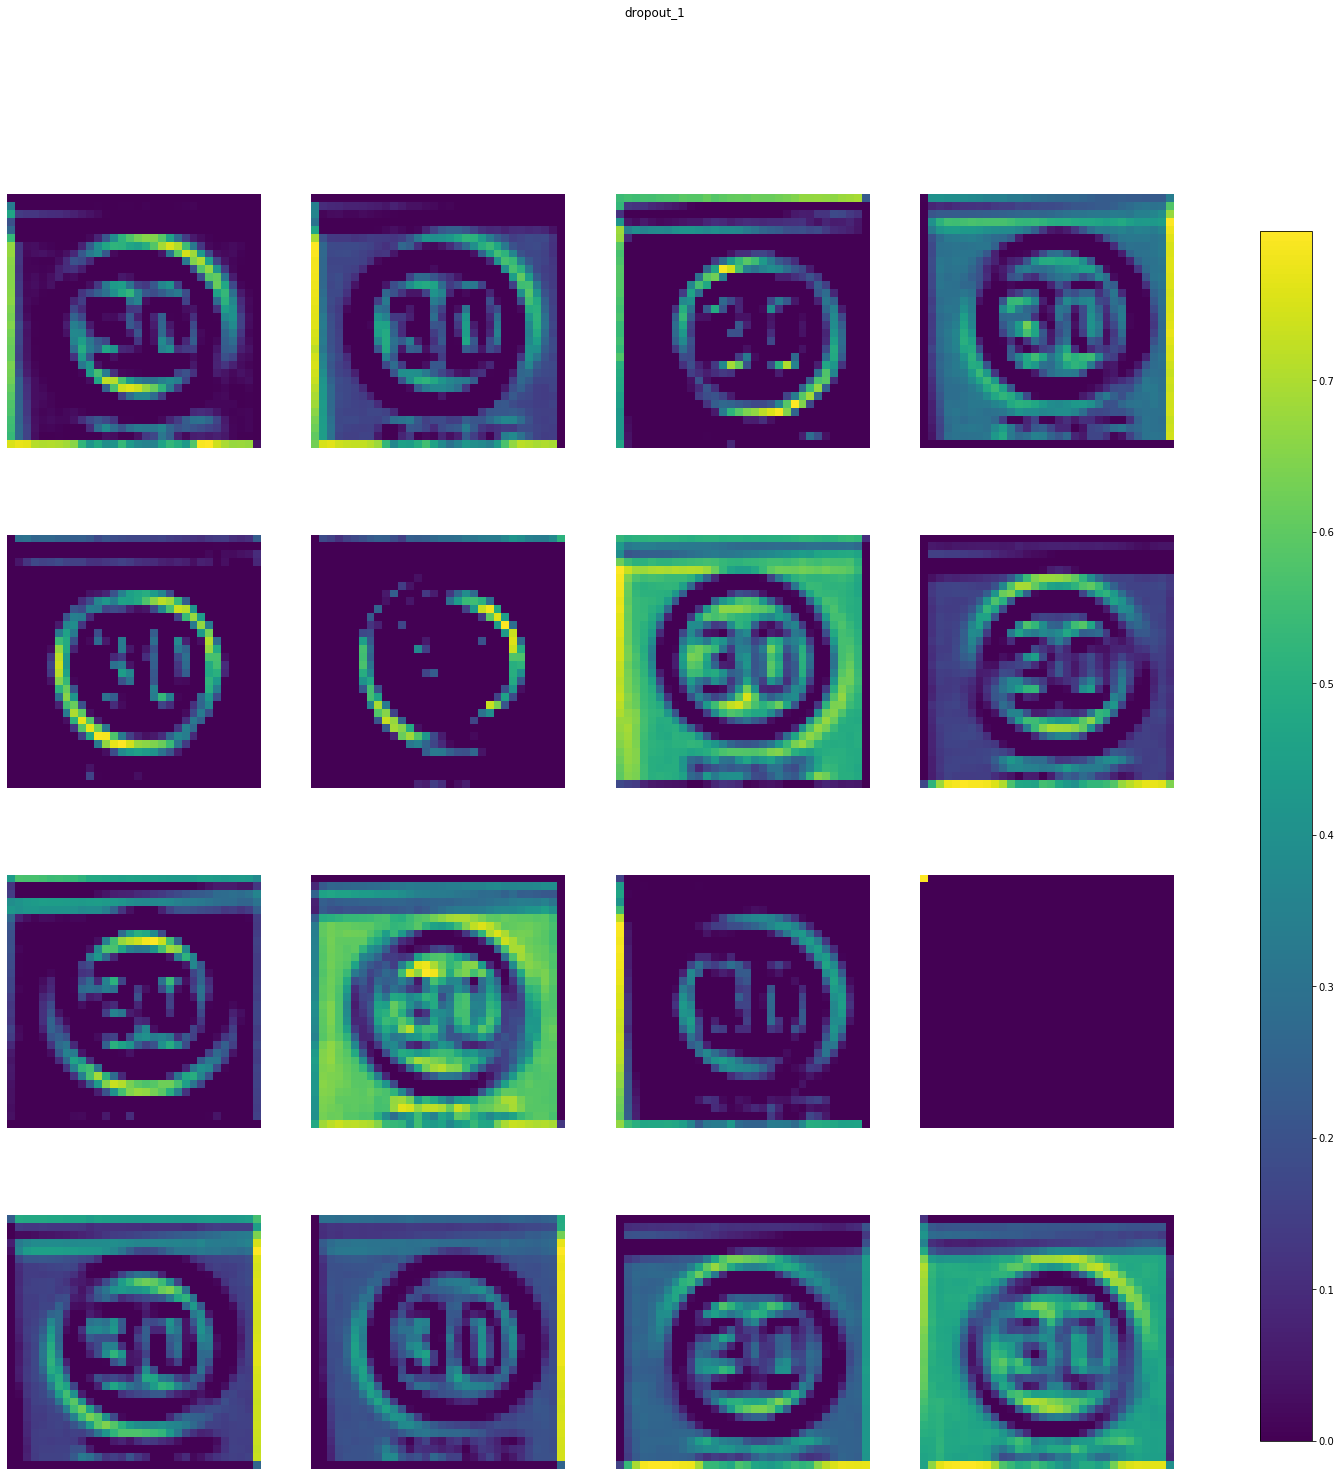

conv2d_2 (1, 32, 32, 64) 


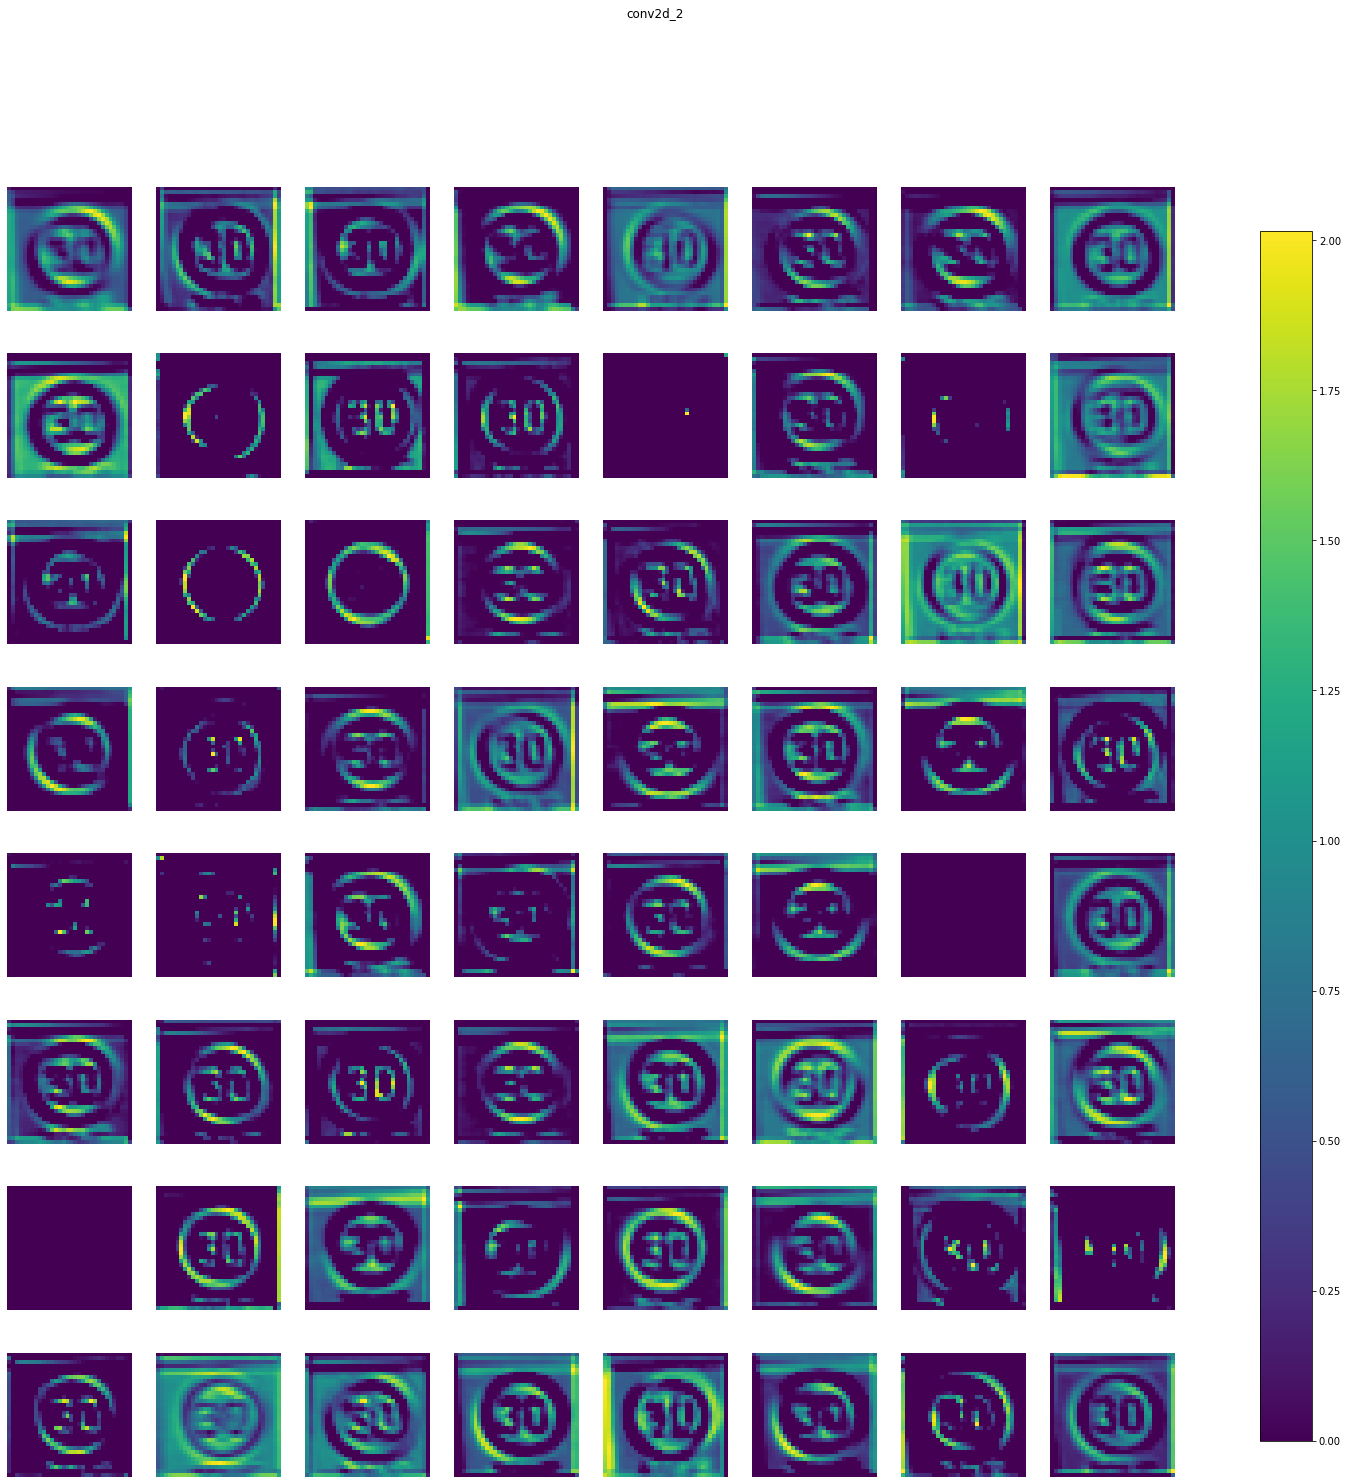

max_pooling2d_1 (1, 16, 16, 64) 


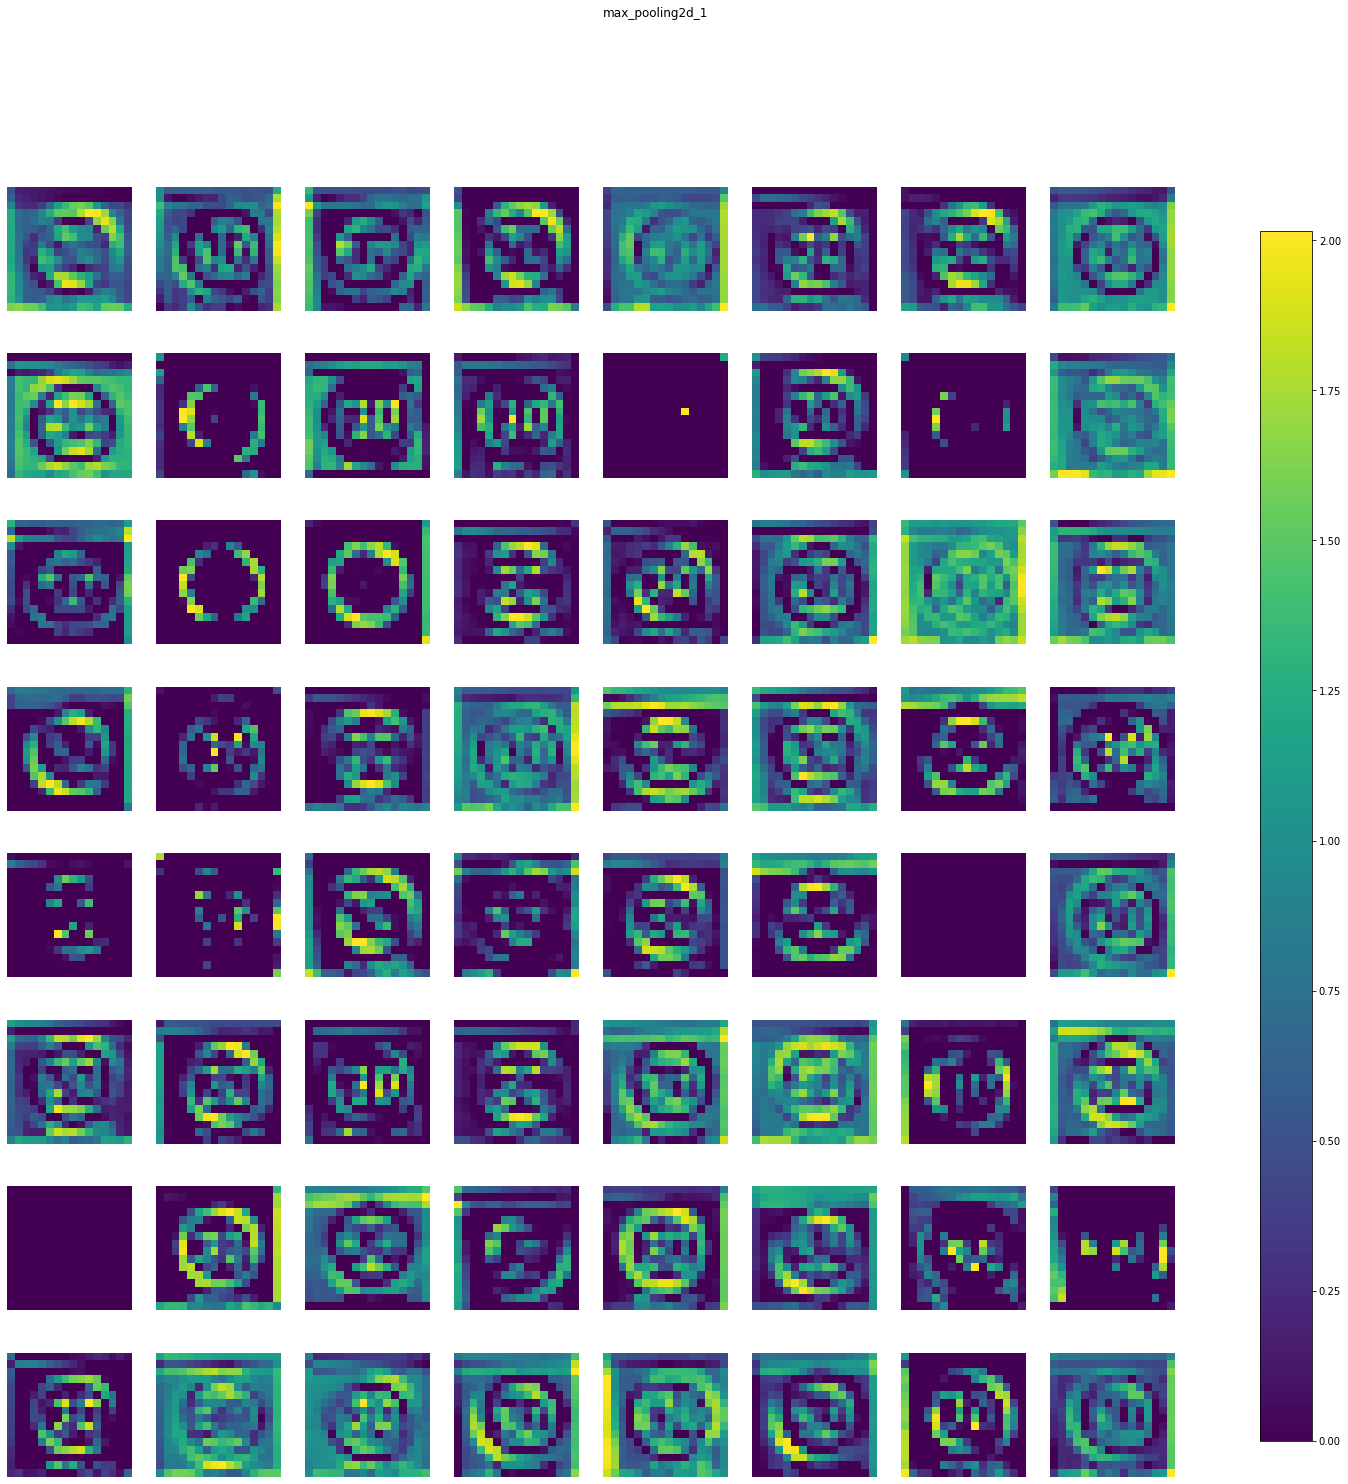

dropout_2 (1, 16, 16, 64) 


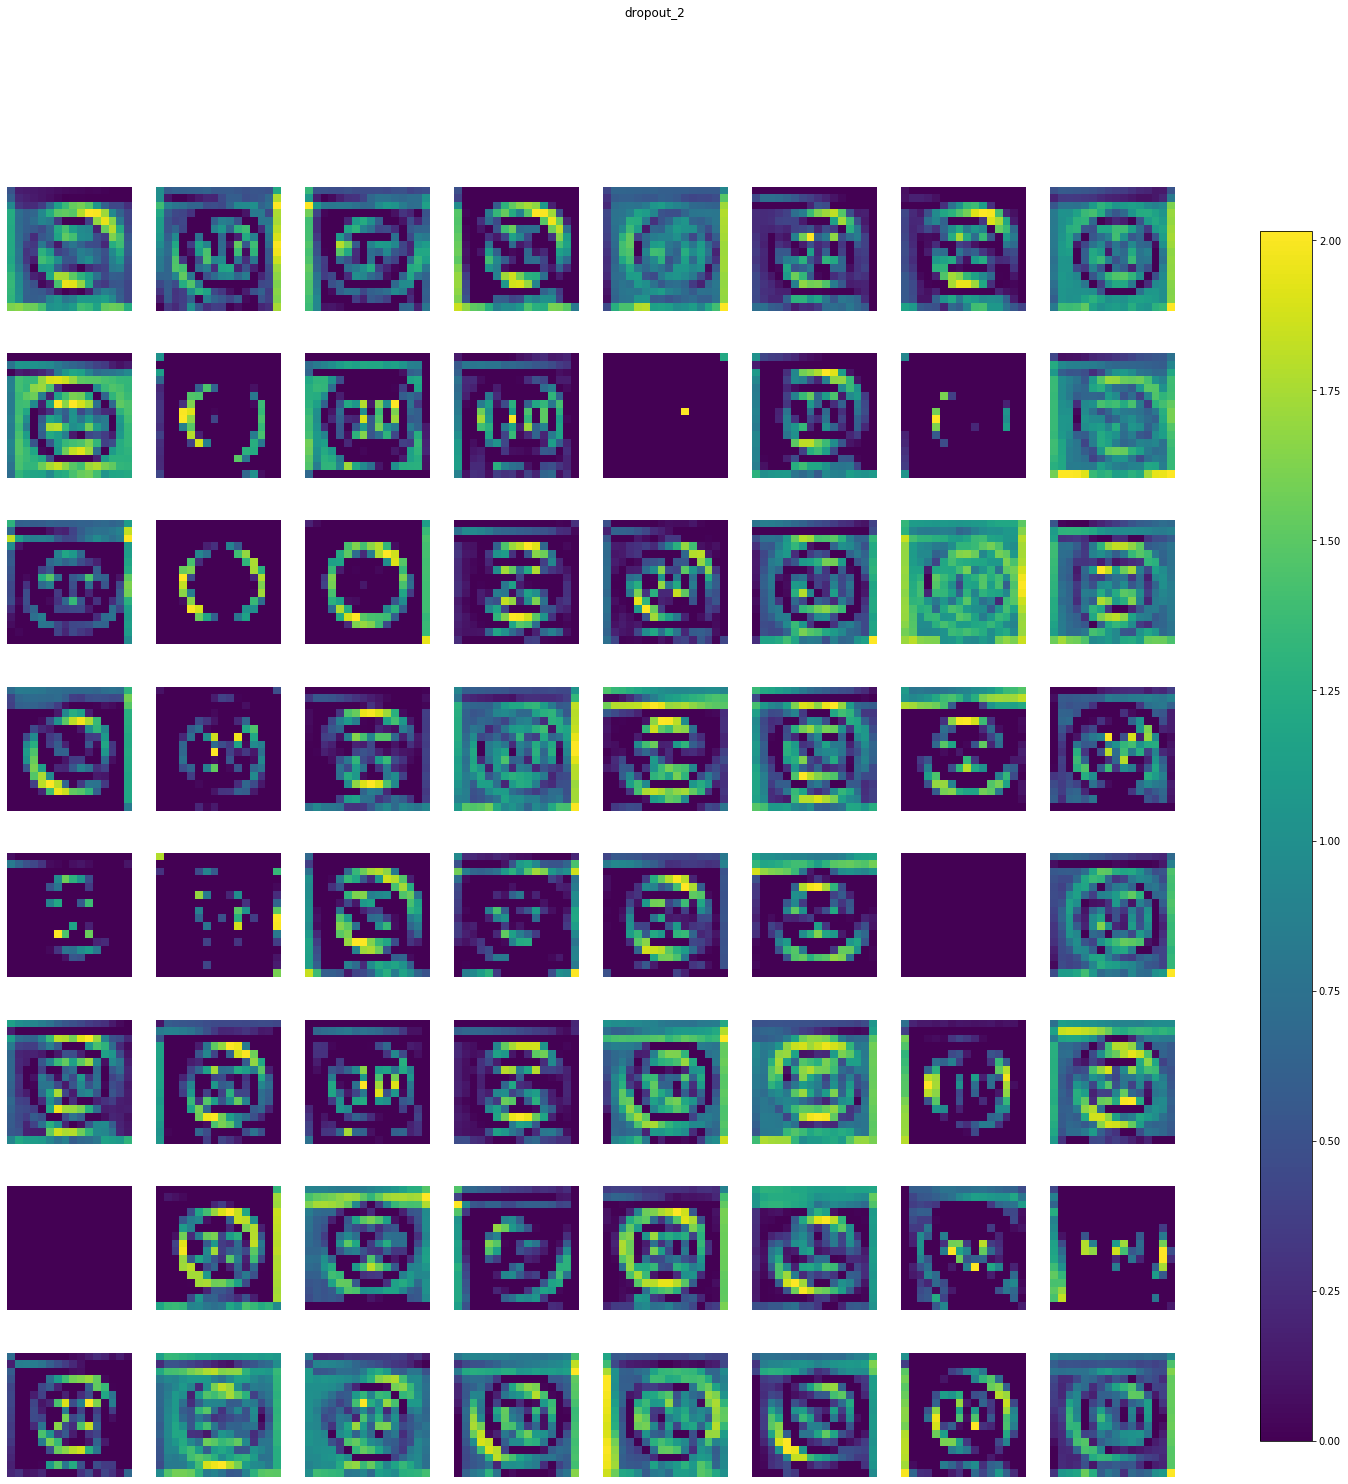

conv2d_3 (1, 16, 16, 128) 


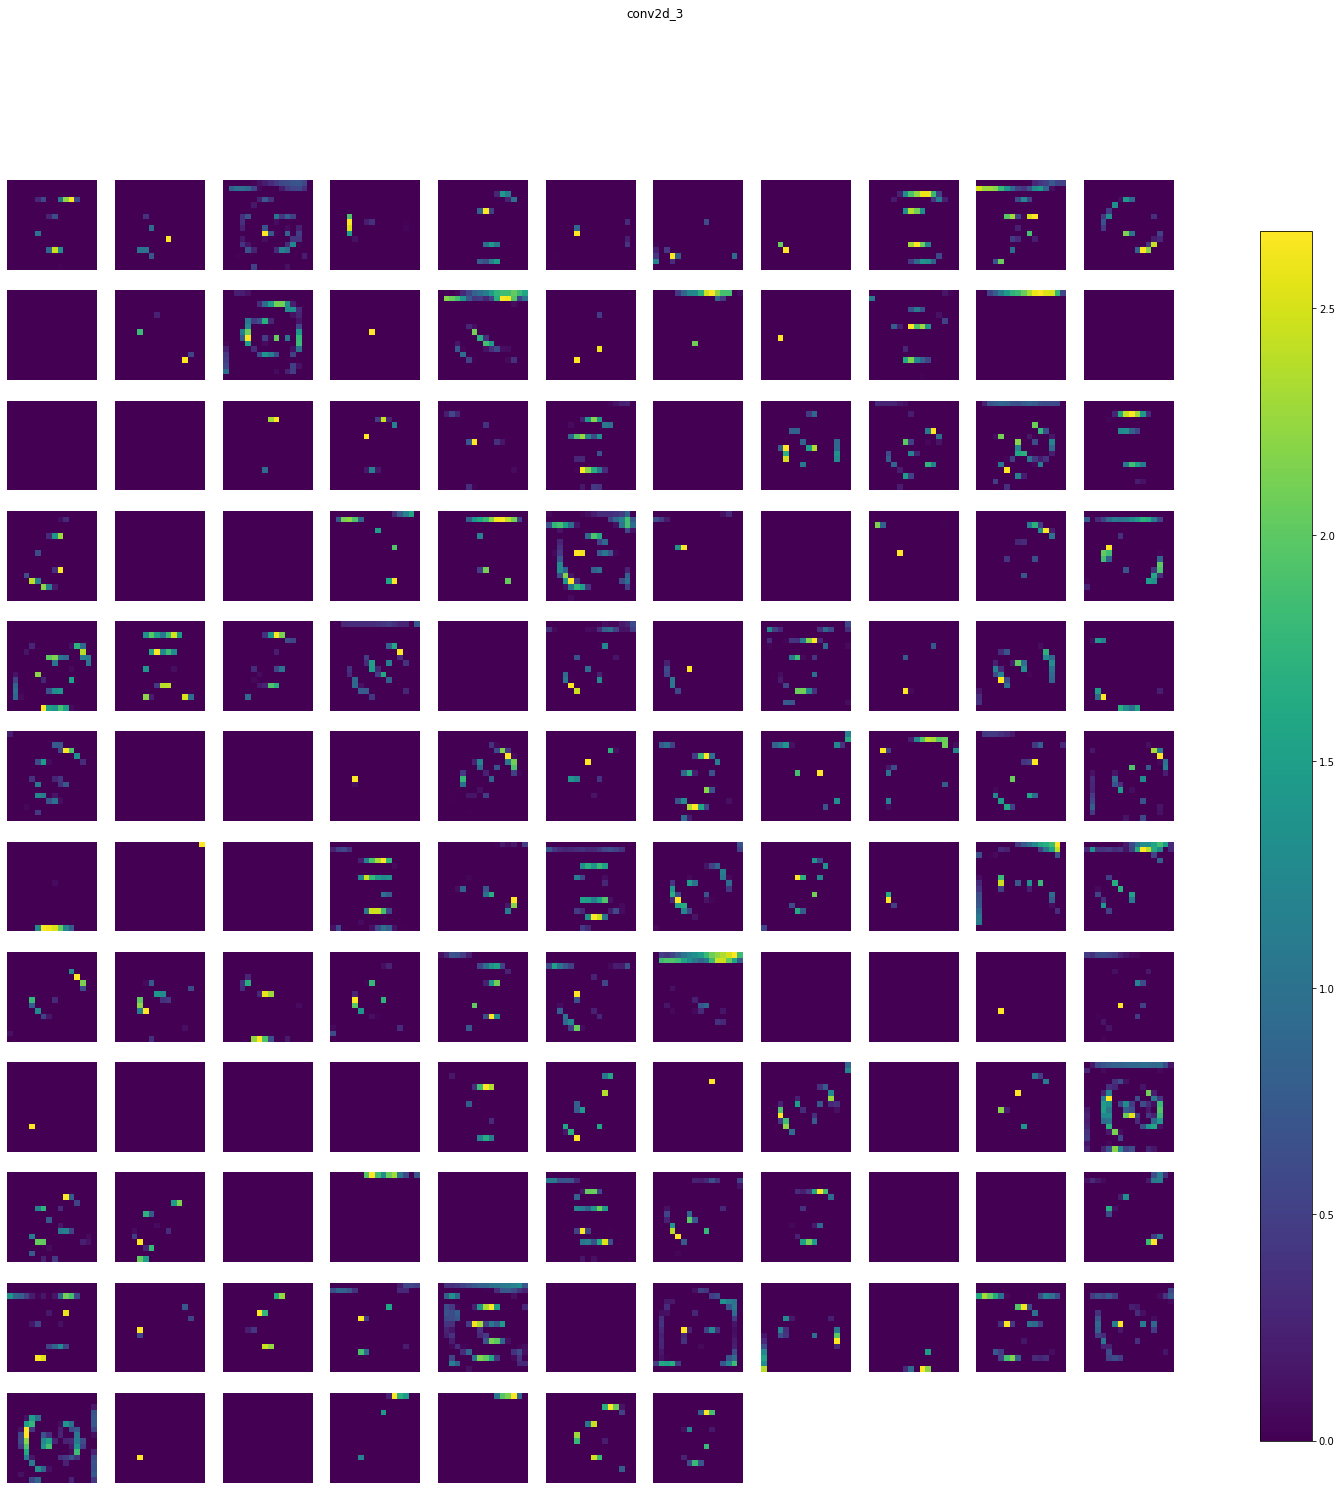

max_pooling2d_2 (1, 8, 8, 128) 


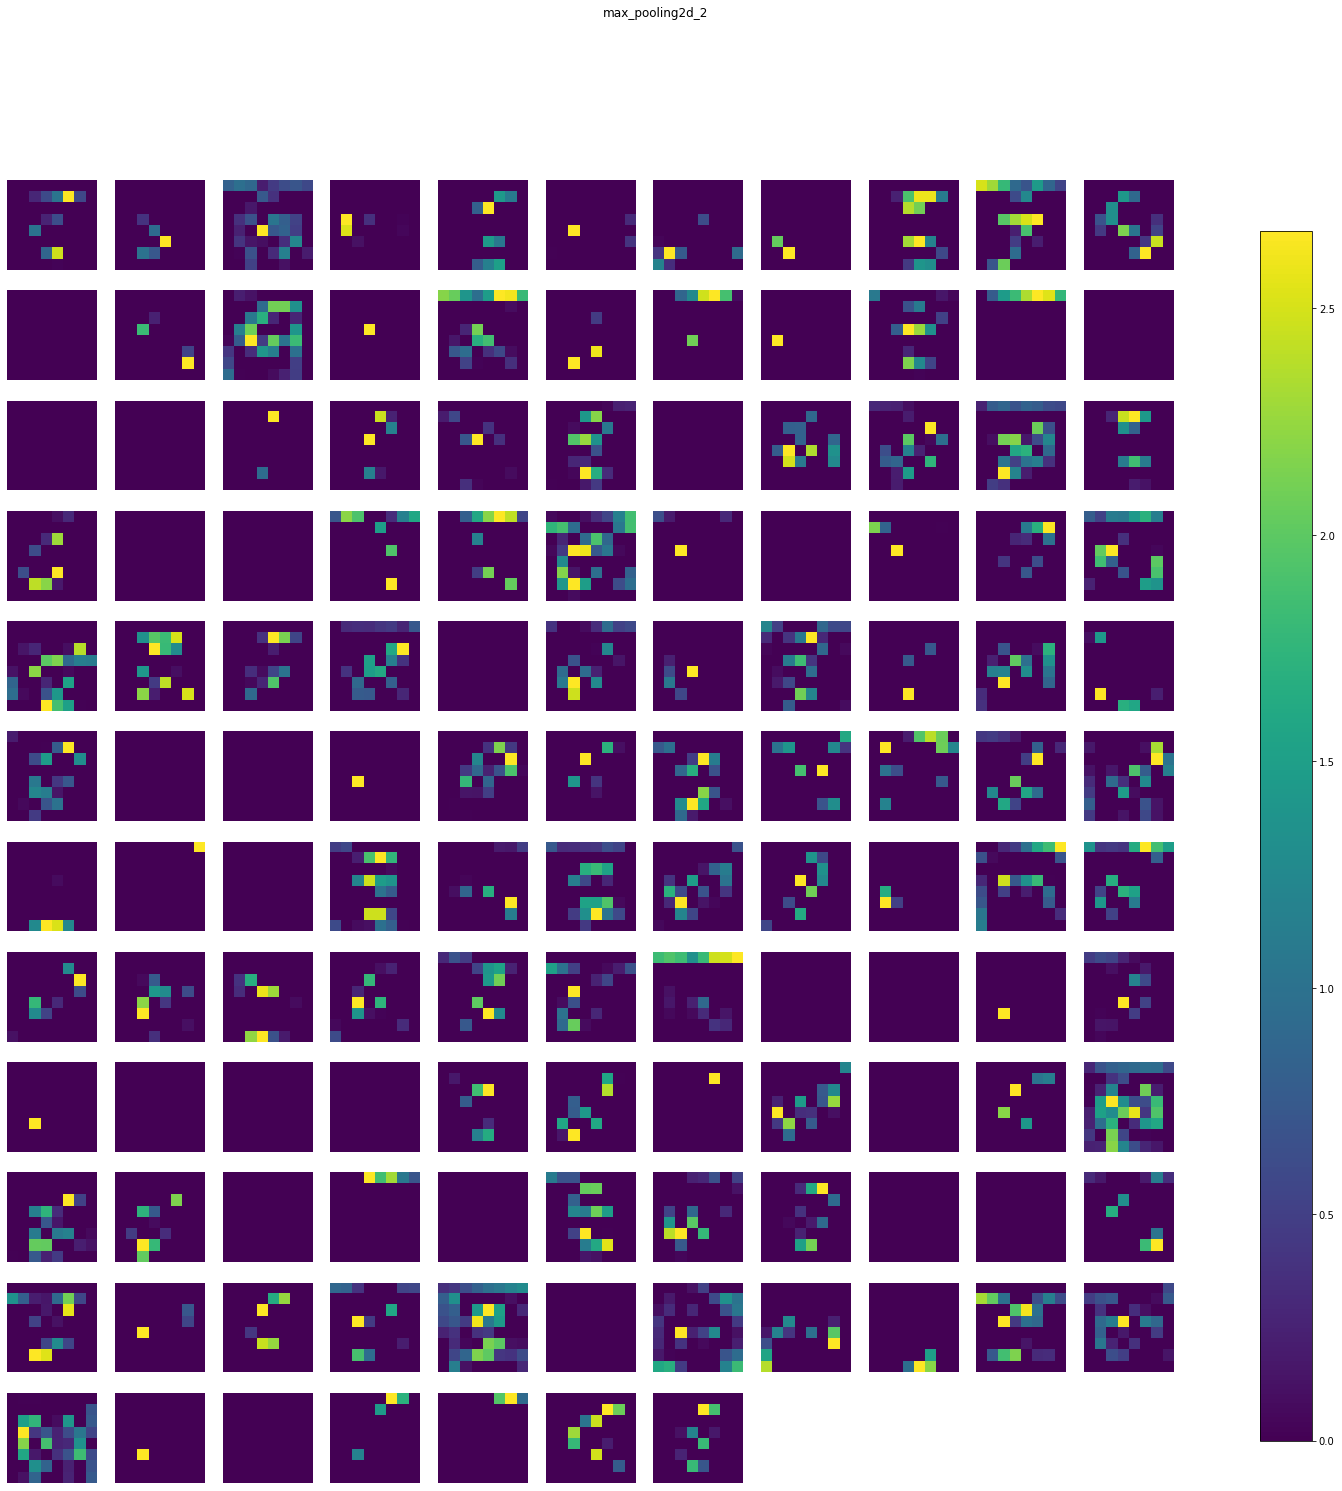

dropout_3 (1, 8, 8, 128) 


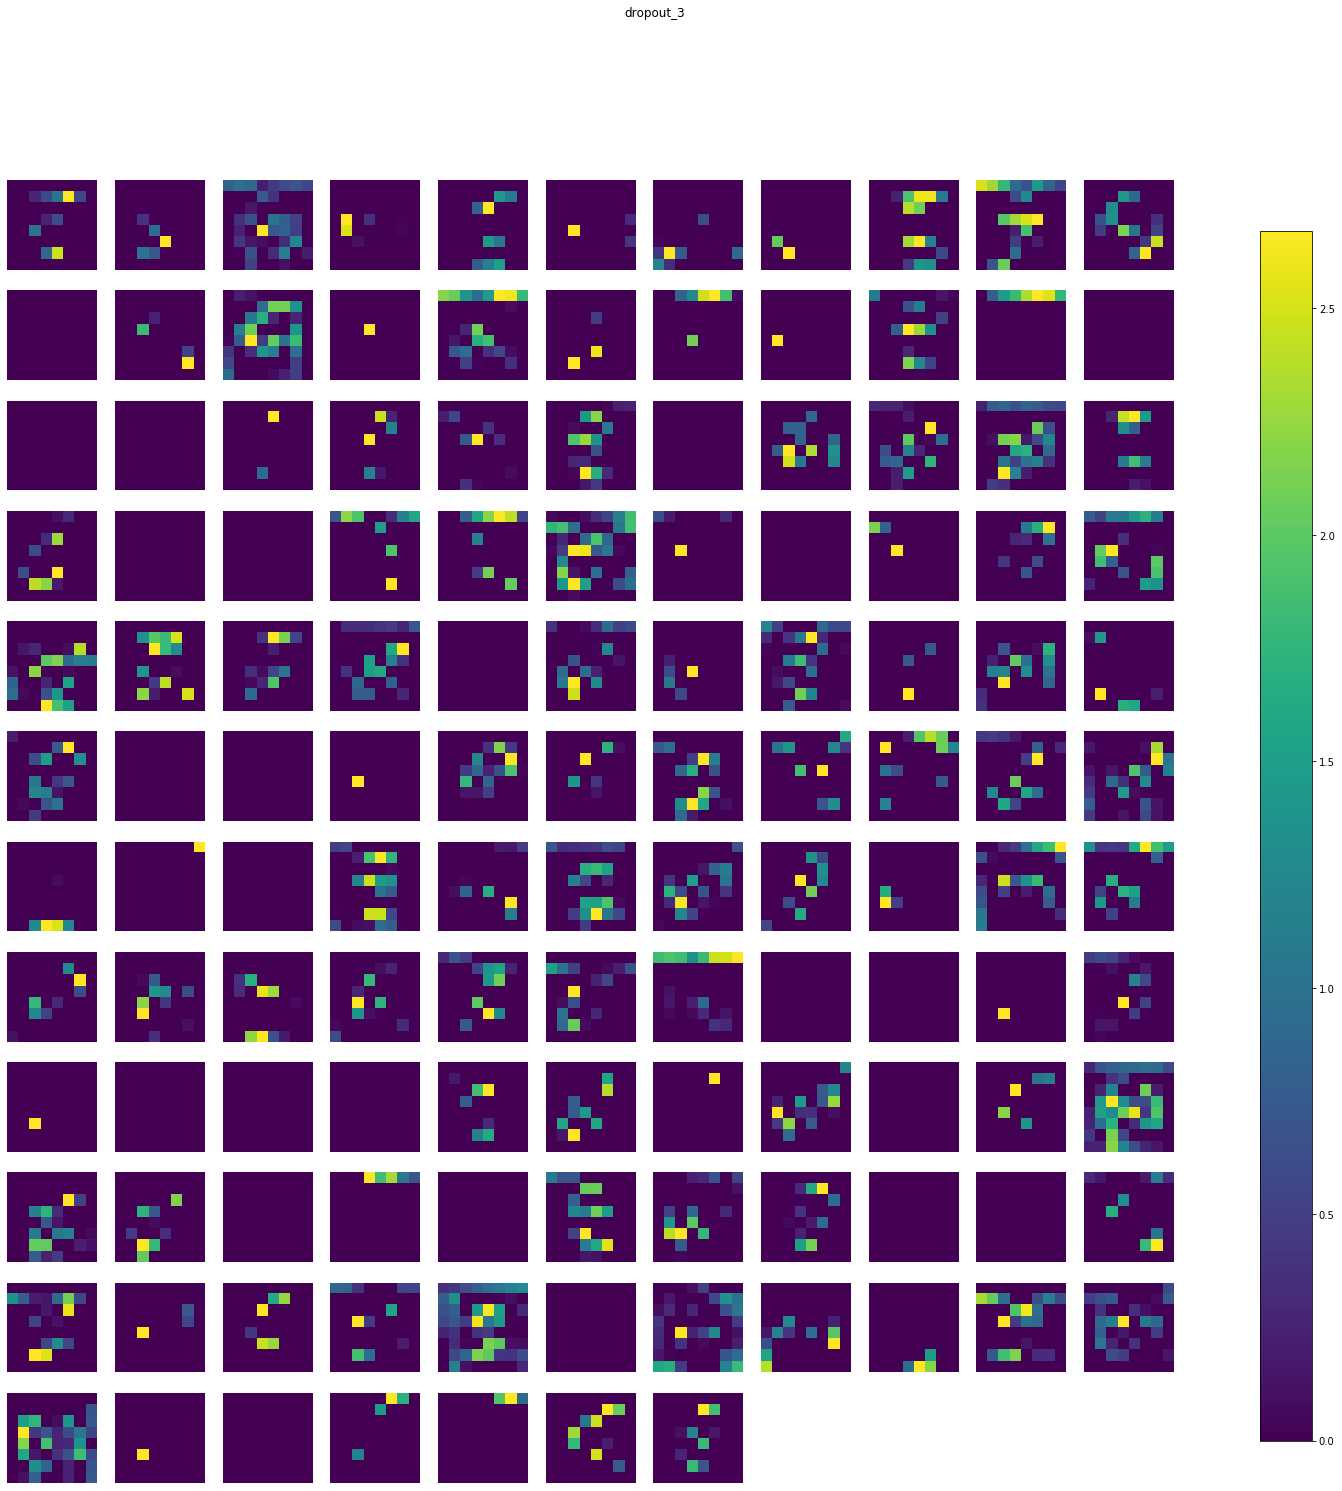

flatten_1 (1, 8192) 


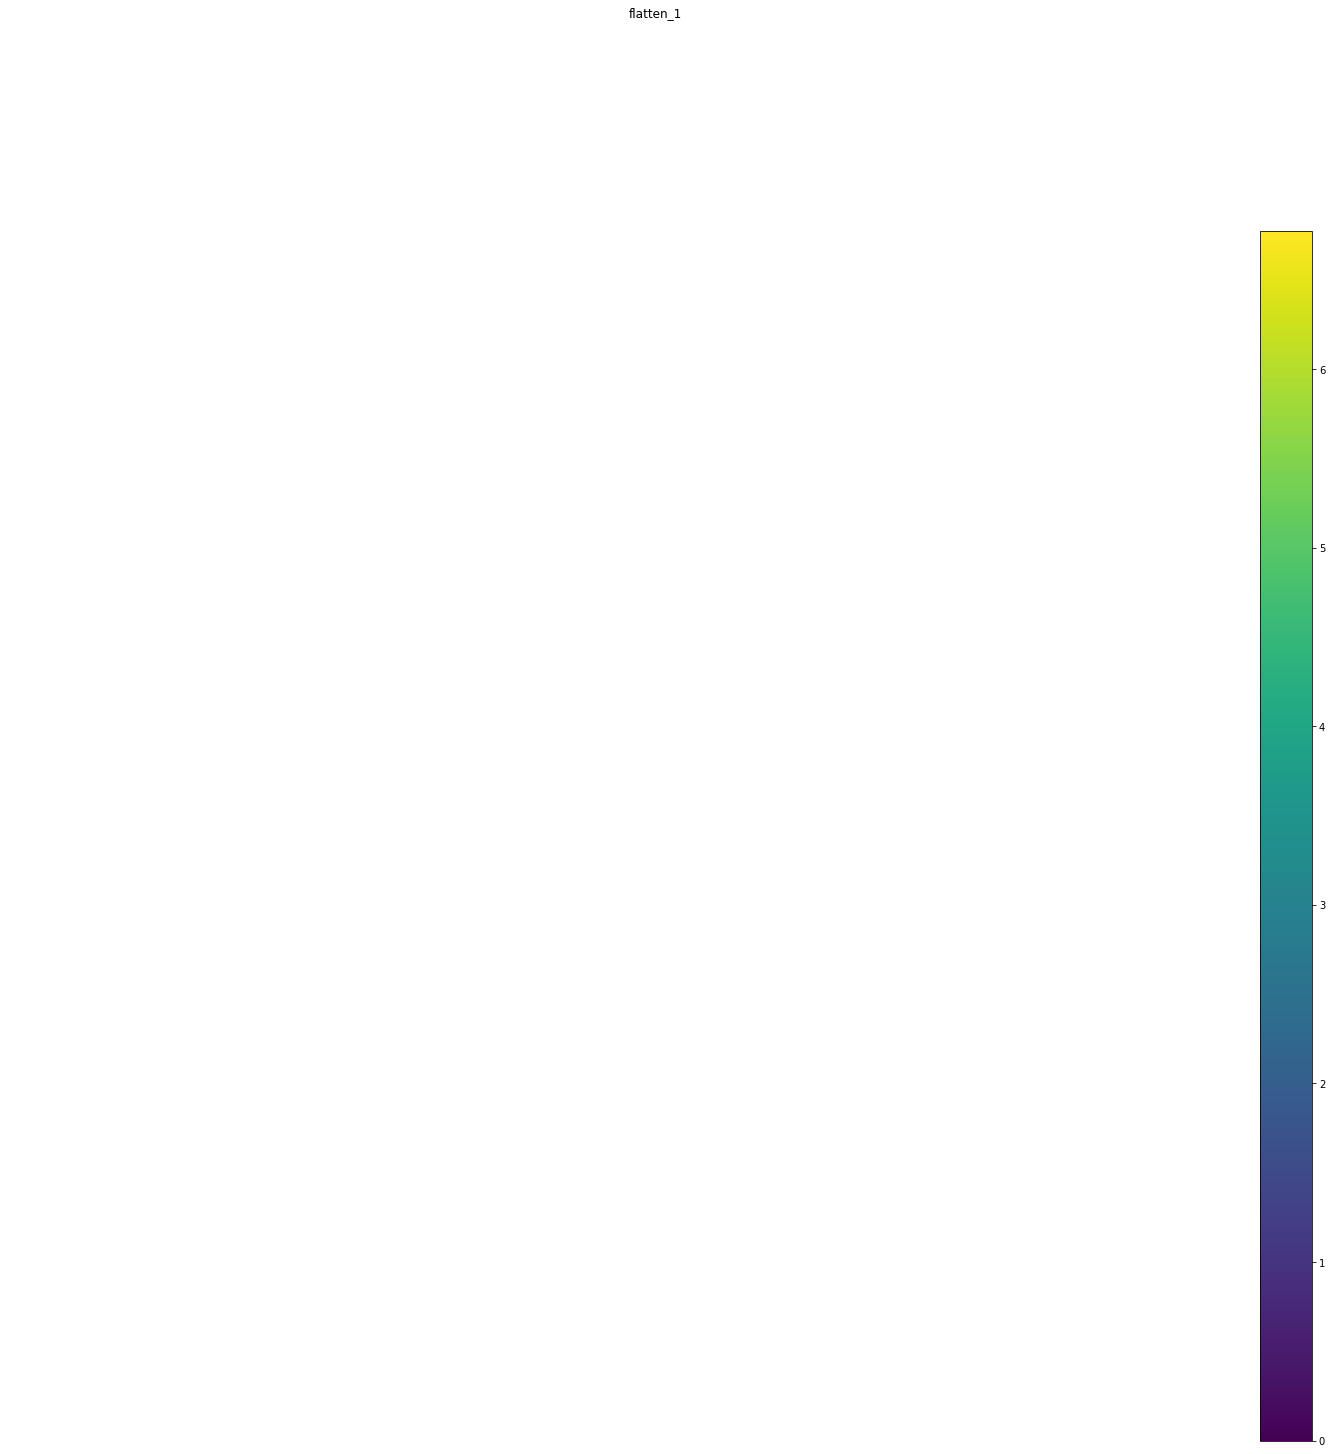

dense_1 (1, 256) 


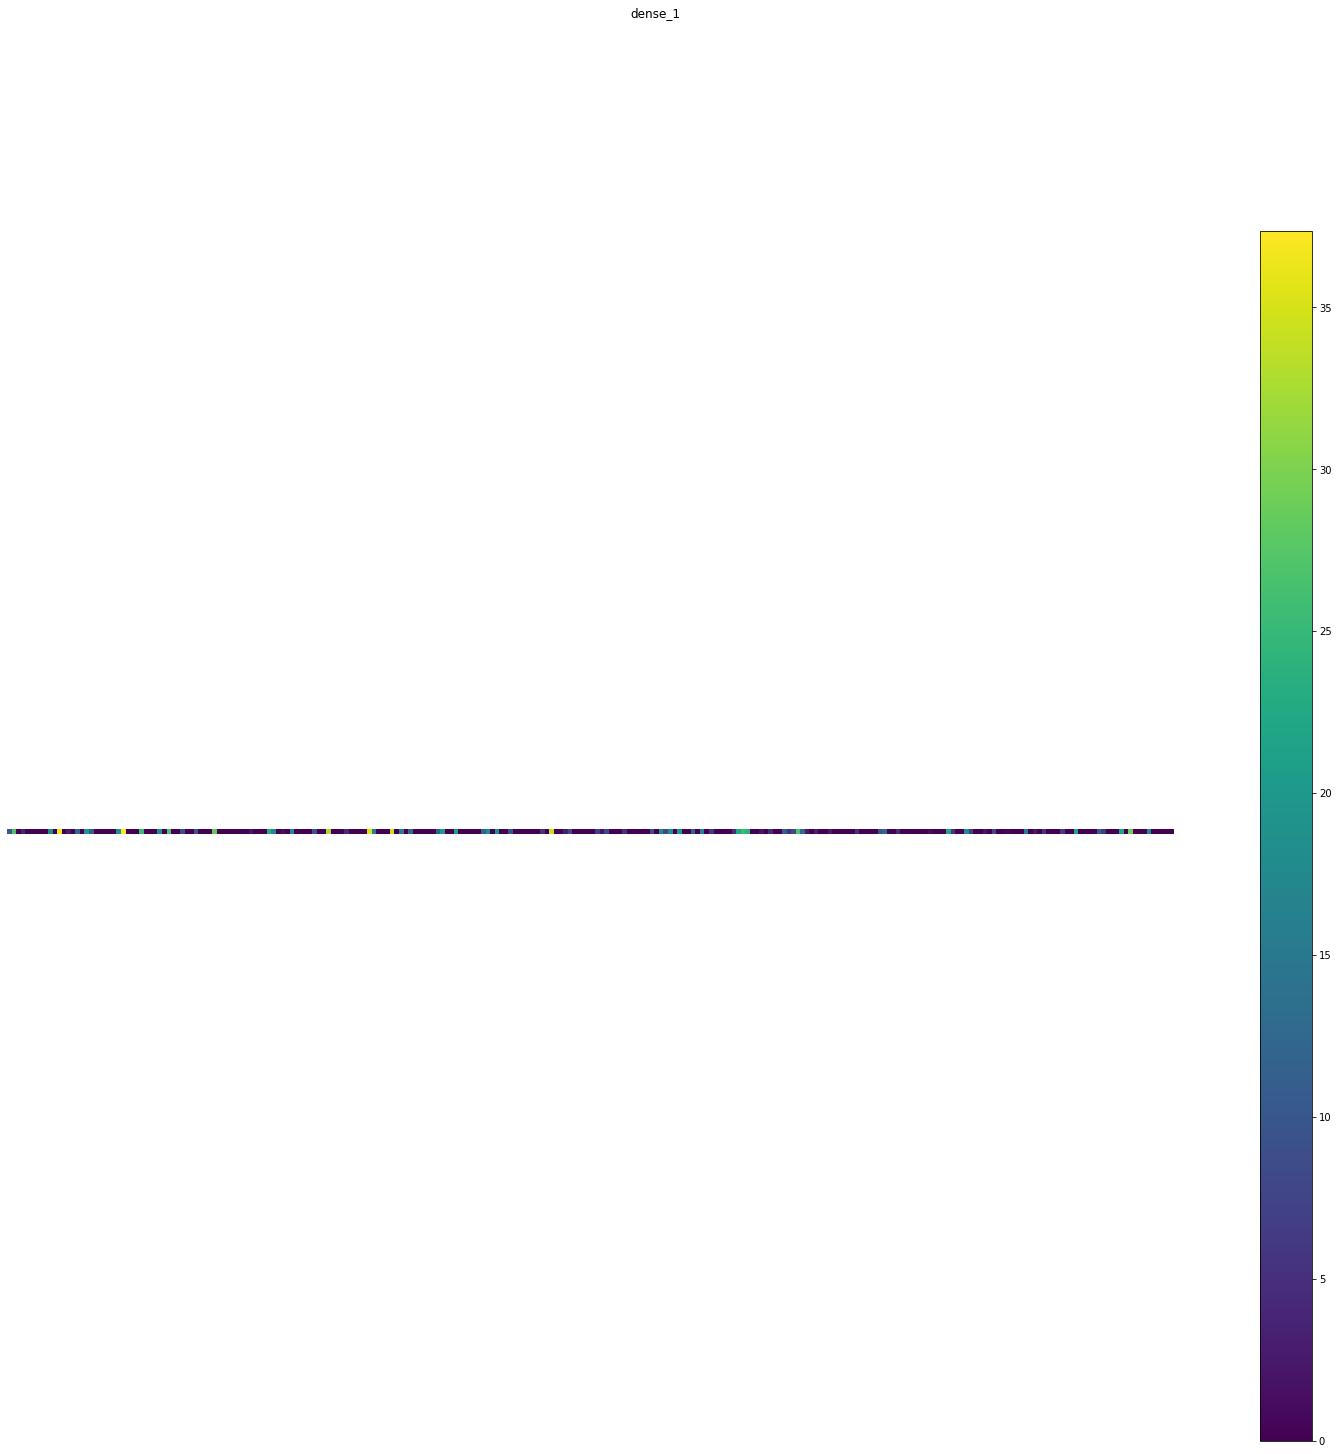

dense_2 (1, 43) 


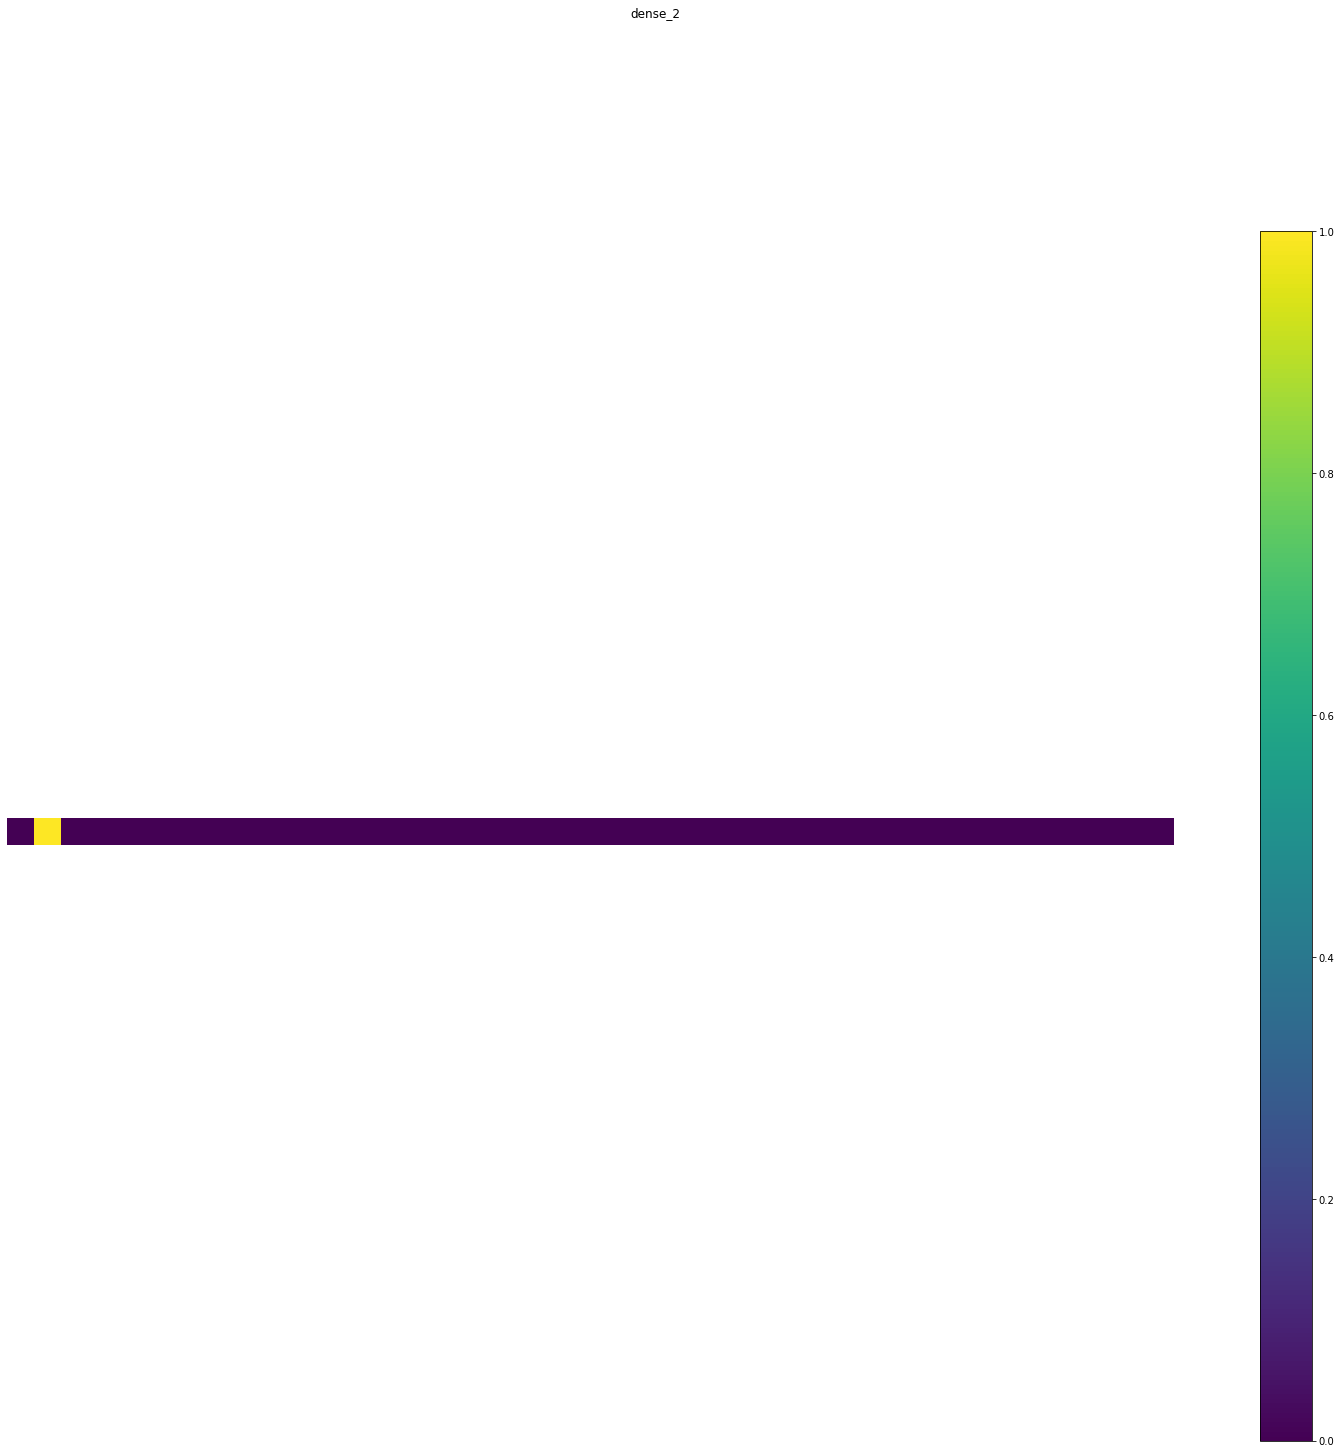

In [17]:
from keract import display_activations
display_activations(activations, save=False)

In [13]:
model_1.predict(X_test, y_test)

/home/darius/anaconda3/lib/python3.7/site-packages/keras/engine/training_utils.py:365: RuntimeWarning: invalid value encountered in floor_divide
  num_batches = (size + batch_size - 1) // batch_size  # round up


TypeError: only integer scalar arrays can be converted to a scalar index

In [15]:
model_1.fit(X, y, batch_size=128, epochs=30, validation_split=0.3)#, callbacks=[tensorboard])

Train on 4321 samples, validate on 1853 samples
Epoch 1/30
4321/4321 [==============================] - 1s 130us/step - loss: 0.1210 - accuracy: 0.9764 - val_loss: 0.0350 - val_accuracy: 0.9914
Epoch 2/30
4321/4321 [==============================] - 0s 97us/step - loss: 0.0605 - accuracy: 0.9873 - val_loss: 0.0805 - val_accuracy: 0.9795
Epoch 3/30
4321/4321 [==============================] - 0s 91us/step - loss: 0.0527 - accuracy: 0.9877 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 4/30
4321/4321 [==============================] - 0s 89us/step - loss: 0.0481 - accuracy: 0.9880 - val_loss: 0.0616 - val_accuracy: 0.9795
Epoch 5/30
4321/4321 [==============================] - 0s 91us/step - loss: 0.0325 - accuracy: 0.9933 - val_loss: 0.2105 - val_accuracy: 0.9439
Epoch 6/30
4321/4321 [==============================] - 0s 94us/step - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.0452 - val_accuracy: 0.9881
Epoch 7/30
4321/4321 [==============================] - 0s 94us/step - loss: 0.02

KeyboardInterrupt: 